<a href="https://colab.research.google.com/github/KeremAydin98/gan-image-generation/blob/main/GAN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
only_eight = X_train[y_train==8]

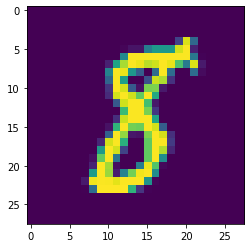

In [ ]:
plt.imshow(only_eight[8])

In [ ]:
only_eight.shape

(5851, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#discriminator model

discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(600,activation='relu'))
discriminator.add(Dense(450,activation='relu'))
discriminator.add(Dense(300,activation='relu'))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(50,activation='relu'))


discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
#generator model
coding_size=100
generator = Sequential()

generator.add(Dense(50,activation='relu',input_shape=[coding_size]))
generator.add(Dense(100, activation='relu'))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(300,activation='relu'))
generator.add(Dense(450,activation='relu'))
generator.add(Dense(600,activation='relu'))


generator.add(Dense(784, activation='relu'))

generator.add(Reshape([28,28]))

In [ ]:
GAN = Sequential([generator,discriminator])

In [ ]:
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
batch_size=16

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(only_eight).shuffle(buffer_size=1000)

In [ ]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [ ]:
# seperating into batches

dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [ ]:
epochs=5

In [ ]:
GAN.layers

In [ ]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  print(f"Currently on epoch {epoch+1}")

  i=0 
  for X_batch in dataset:
    i=i+1
    if i%100==0:
      print(f"Currently on batch number {i}")
    
    #DISCRIMINATOR TRAINING PHASE
    noise = tf.random.normal(shape=[batch_size,coding_size])

    gen_images = generator(noise)

    X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)

    y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)

    #now it is time to train the discriminator
    discriminator.trainable = True
    discriminator.train_on_batch(X_fake_vs_real,y1)

    #GENERATOR TRAINING PHASE
    noise = tf.random.normal(shape=[batch_size,coding_size])
    y2 = tf.constant([[1.0]]*batch_size)

    discriminator.trainable = False #so that we will only train the generator

    GAN.train_on_batch(noise,y2)


Currently on epoch 1
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 2
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 3
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 4
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300
Currently on epoch 5
Currently on batch number 100
Currently on batch number 200
Currently on batch number 300


In [ ]:
noise = tf.random.normal([5,coding_size])

noise.shape

TensorShape([5, 100])

In [ ]:
fake_images = generator(noise)

In [ ]:
fake_images.shape

TensorShape([5, 28, 28])

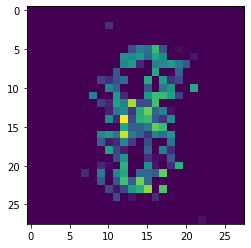

In [ ]:
plt.imshow(fake_images[4])